# LSTM STOCK PREDICTOR

In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
start_date="2010-01-01"
end_date="2018-12-31"
stock_data=pd.DataFrame()

# download LNT stock price data
stock_data = yf.download("LT.NS", start=start_date, end=end_date)
stock_data.to_csv('lnt_stock_data.csv', index=False)


[*********************100%***********************]  1 of 1 completed


In [3]:
stock_data = pd.read_csv("lnt_stock_data.csv")[["Close"]]
stock_data.describe()

,Close
count,2218.000000
mean,901.464703
std,248.912473
min,434.533325
25%,693.183350
50%,869.311127
75%,1113.549988
max,1455.599976


In [4]:
# Divide into 90% training and 10% testing
X_tr = stock_data[:int(len(stock_data)*0.9)].values
X_te = stock_data[int(len(stock_data)*0.9):].values

#len(train_df), len(test_df)

In [5]:
#train_df

In [6]:
#train_df.columns

In [7]:
#tr_df=train_df[::-1]

In [8]:
#te_df=test_df[::-1]

In [9]:
#te_df.shape

In [10]:
#X_tr=train_df['PREV. CLOSE ']
#X_te=test_df['PREV. CLOSE ']

In [11]:
#X_tr.shape

In [12]:
#X_tr=X_tr.dropna()
#X_te=X_te.dropna()

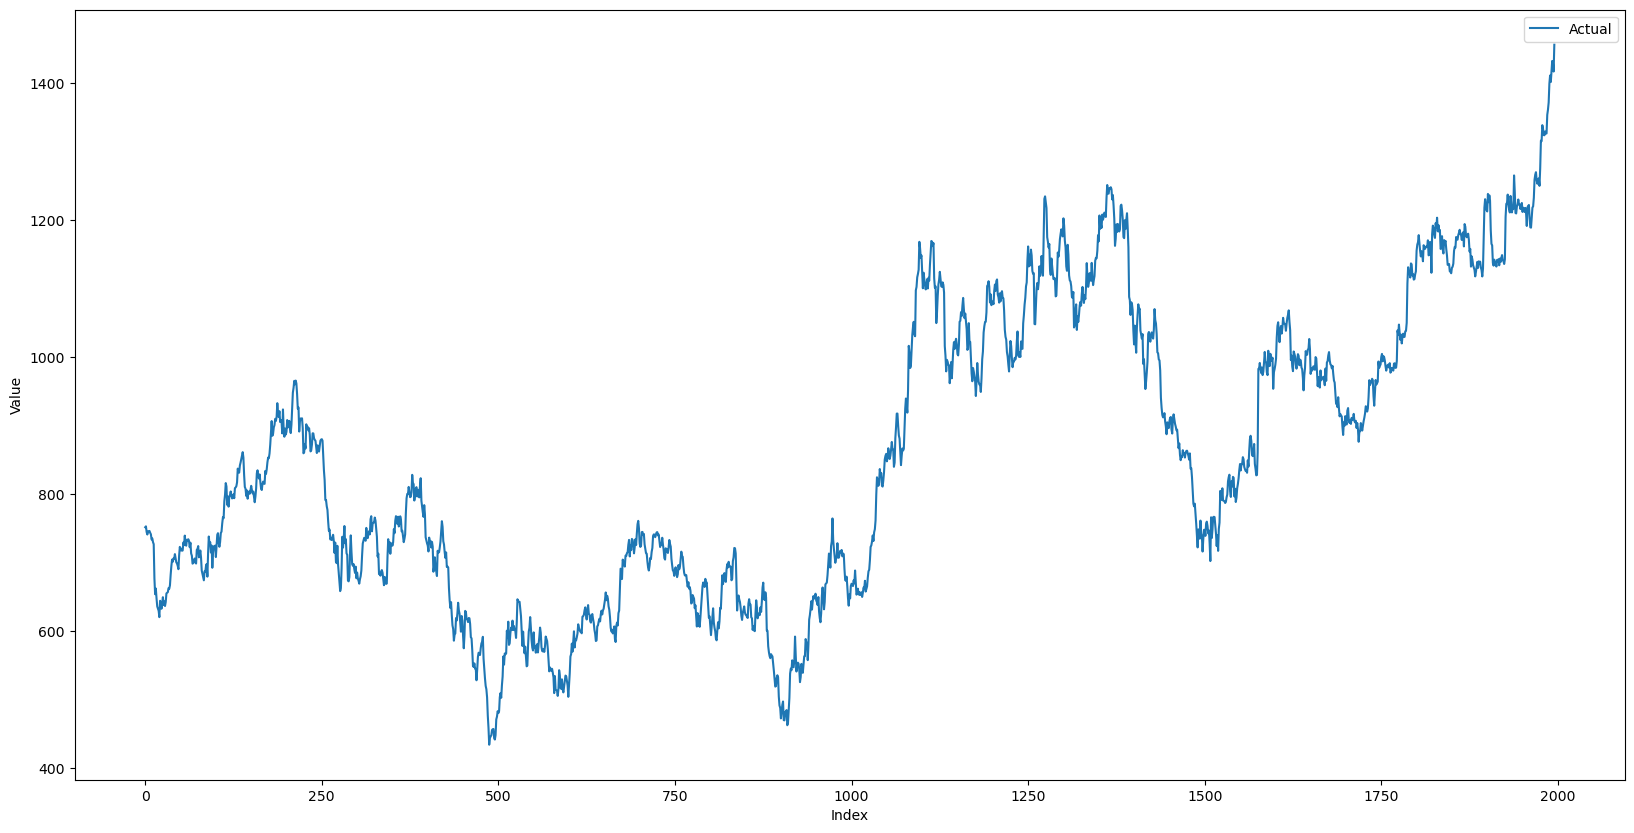

In [13]:
plt.figure(figsize=(20, 10))
plt.plot(X_tr, label='Actual')
#plt.plot(y_p, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Value')
#plt.title('Actual vs Predicted (Matplotlib)')
plt.legend()
plt.show()

In [14]:
scale=MinMaxScaler(feature_range=(0,1))
Xr1_df=scale.fit_transform(np.array(X_tr).reshape(-1,1))

In [15]:
Xe1_df=scale.fit_transform(np.array(X_te).reshape(-1,1))

Now, I'll be keeping timestamp=10, i.e every 10 day inputs determine the 11th day output. For that we need to perform data preprocessing

In [16]:
def create_sequences(data, timestep):
    X, y = [], []
    for i in range(len(data) - timestep):
        X.append(data[i:(i+timestep)])  # Input sequence of length timestep
        y.append(data[i+timestep])    # Output value for the next day
    return np.array(X), np.array(y)

timestep = 30
X_train, y_train = create_sequences(Xr1_df, timestep)
x_test, y_test = create_sequences(Xe1_df,timestep)

In [17]:
x_test[:2]

array([[[0.86046937],
        [0.65600951],
        [0.61417027],
        [0.53799091],
        [0.59186902],
        [0.52022892],
        [0.60410495],
        [0.64633881],
        [0.60351279],
        [0.51687398],
        [0.38701406],
        [0.36767313],
        [0.33688599],
        [0.37319918],
        [0.41148593],
        [0.57943553],
        [0.55516073],
        [0.47641613],
        [0.46477188],
        [0.40753882],
        [0.33925415],
        [0.2599174 ],
        [0.34083309],
        [0.36727852],
        [0.44444466],
        [0.41563058],
        [0.41760414],
        [0.38543512],
        [0.28360004],
        [0.32405789]],

       [[0.65600951],
        [0.61417027],
        [0.53799091],
        [0.59186902],
        [0.52022892],
        [0.60410495],
        [0.64633881],
        [0.60351279],
        [0.51687398],
        [0.38701406],
        [0.36767313],
        [0.33688599],
        [0.37319918],
        [0.41148593],
        [0.57943553],
        

In [18]:
X_train.shape


(1966, 30, 1)

In [19]:
Xr1_df.shape

(1996, 1)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


return_sequences=False:
When return_sequences is set to False (the default behavior), the LSTM layer will only return the last hidden state corresponding to the last timestep in the input sequence. This is useful when the LSTM layer is followed by a single Dense layer or another type of output layer that only expects a single hidden state for the entire input sequence. It's common to use this setting in the last LSTM layer of a sequence-to-one model, where the goal is to predict a single output value based on the entire input sequence.

return_sequences=True:
When return_sequences is set to True, the LSTM layer will return the full sequence of hidden states for each timestep in the input sequence. This setting is often used when you have multiple LSTM layers stacked on top of each other, forming a sequence-to-sequence model or a sequence-to-vector model.

In [24]:
model = Sequential()
model.add(LSTM(50,activation='relu', return_sequences=True, input_shape=(30, 1)))  # First LSTM layer
model.add(LSTM(50,activation='relu'))  # Second LSTM layer with return_sequences=True
model.add(Dense(1))  # Output layer for predicting the next value in the sequence
model.compile(optimizer='adam', loss='mean_squared_error')


In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 30, 50)            10400     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
62/62 [==============================] - 3s 19ms/step - loss: 0.0349
Epoch 2/100
62/62 [==============================] - 1s 18ms/step - loss: 0.0017
Epoch 3/100
62/62 [==============================] - 1s 19ms/step - loss: 0.0014
Epoch 4/100
62/62 [==============================] - 1s 18ms/step - loss: 0.0013
Epoch 5/100
62/62 [==============================] - 1s 20ms/step - loss: 0.0012
Epoch 6/100
62/62 [==============================] - 1s 17ms/step - loss: 0.0011
Epoch 7/100
62/62 [==============================] - 1s 19ms/step - loss: 9.8114e-04
Epoch 8/100
62/62 [==============================] - 1s 20ms/step - loss: 8.9148e-04
Epoch 9/100
62/62 [==============================] - 1s 18ms/step - loss: 7.2113e-04
Epoch 10/100
62/62 [==============================] - 1s 18ms/step - loss: 6.3624e-04
Epoch 11/100
62/62 [==============================] - 1s 17ms/step - loss: 5.9727e-04
Epoch 12/100
62/62 [==============================] - 1s 20ms/step - loss: 5.7628e-04
E

In [27]:
t_p=model.predict(X_train)

62/62 [==============================] - 1s 8ms/step


In [28]:
t_p

array([[0.1962775 ],
       [0.20896423],
       [0.20967749],
       ...,
       [0.96584076],
       [0.9673361 ],
       [0.95246845]], dtype=float32)

In [29]:
test_predict=model.predict(x_test)

6/6 [==============================] - 0s 9ms/step


In [30]:
test_predict
len(test_predict)

192

In [31]:
test_p = scale.inverse_transform(test_predict)

In [32]:
train_p=scale.inverse_transform(t_p)

In [33]:
Y_test=scale.inverse_transform(y_test)

In [34]:
test_p.shape

(192, 1)

In [35]:
train_p.shape

(1966, 1)

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
mse_value = mean_squared_error(Y_test, test_p)

# Calculate MAPE
mape_value = mean_absolute_percentage_error(Y_test, test_p)

print("Mean Squared Error (MSE) test set:", mse_value)
print("Mean Absolute Percentage Error (MAPE) Test Set:", mape_value, "%")

Mean Squared Error (MSE) test set: 456.14445175486617
Mean Absolute Percentage Error (MAPE) Test Set: 0.01243641180371527 %


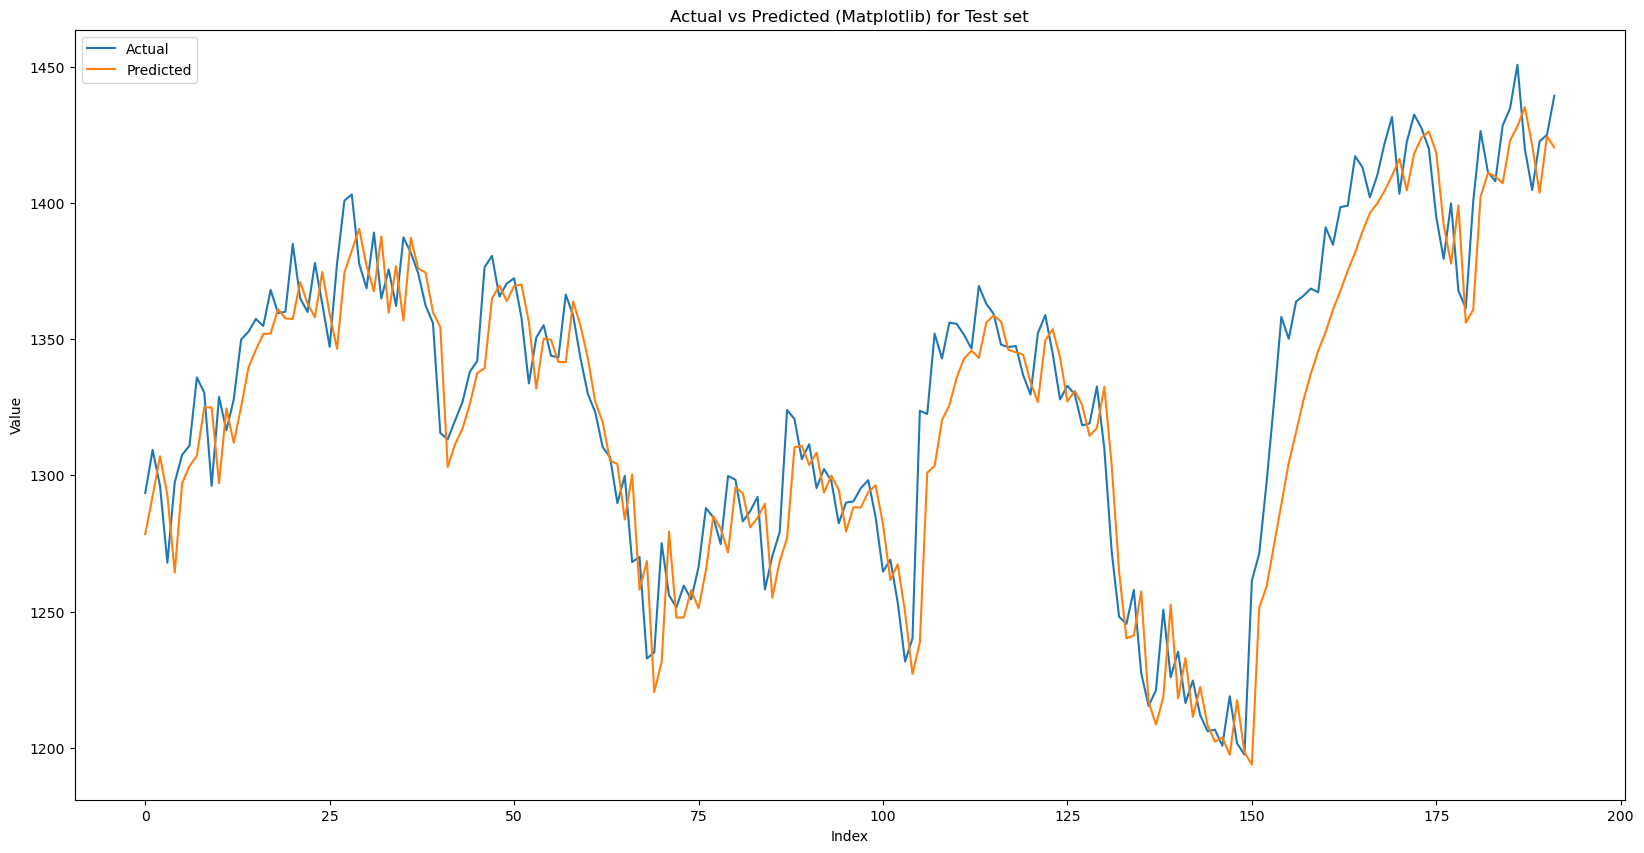

In [37]:
plt.figure(figsize=(20, 10))
plt.plot(Y_test, label='Actual')
plt.plot(test_p, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted (Matplotlib) for Test set')
plt.legend()
plt.show()

In [38]:
y_test.shape

(192, 1)

In [39]:
Y_test.shape

(192, 1)

In [40]:
test_p.shape

(192, 1)

In [41]:
Y_train=scale.inverse_transform(y_train)

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
mse_value = mean_squared_error(Y_train, train_p)

# Calculate MAPE
mape_value = mean_absolute_percentage_error(Y_train, train_p)

print("Mean Squared Error (MSE) Training set:", mse_value)
print("Mean Absolute Percentage Error (MAPE) Training Set:", mape_value, "%")

Mean Squared Error (MSE) Training set: 17.697580659773347
Mean Absolute Percentage Error (MAPE) Training Set: 0.0024248408784305927 %


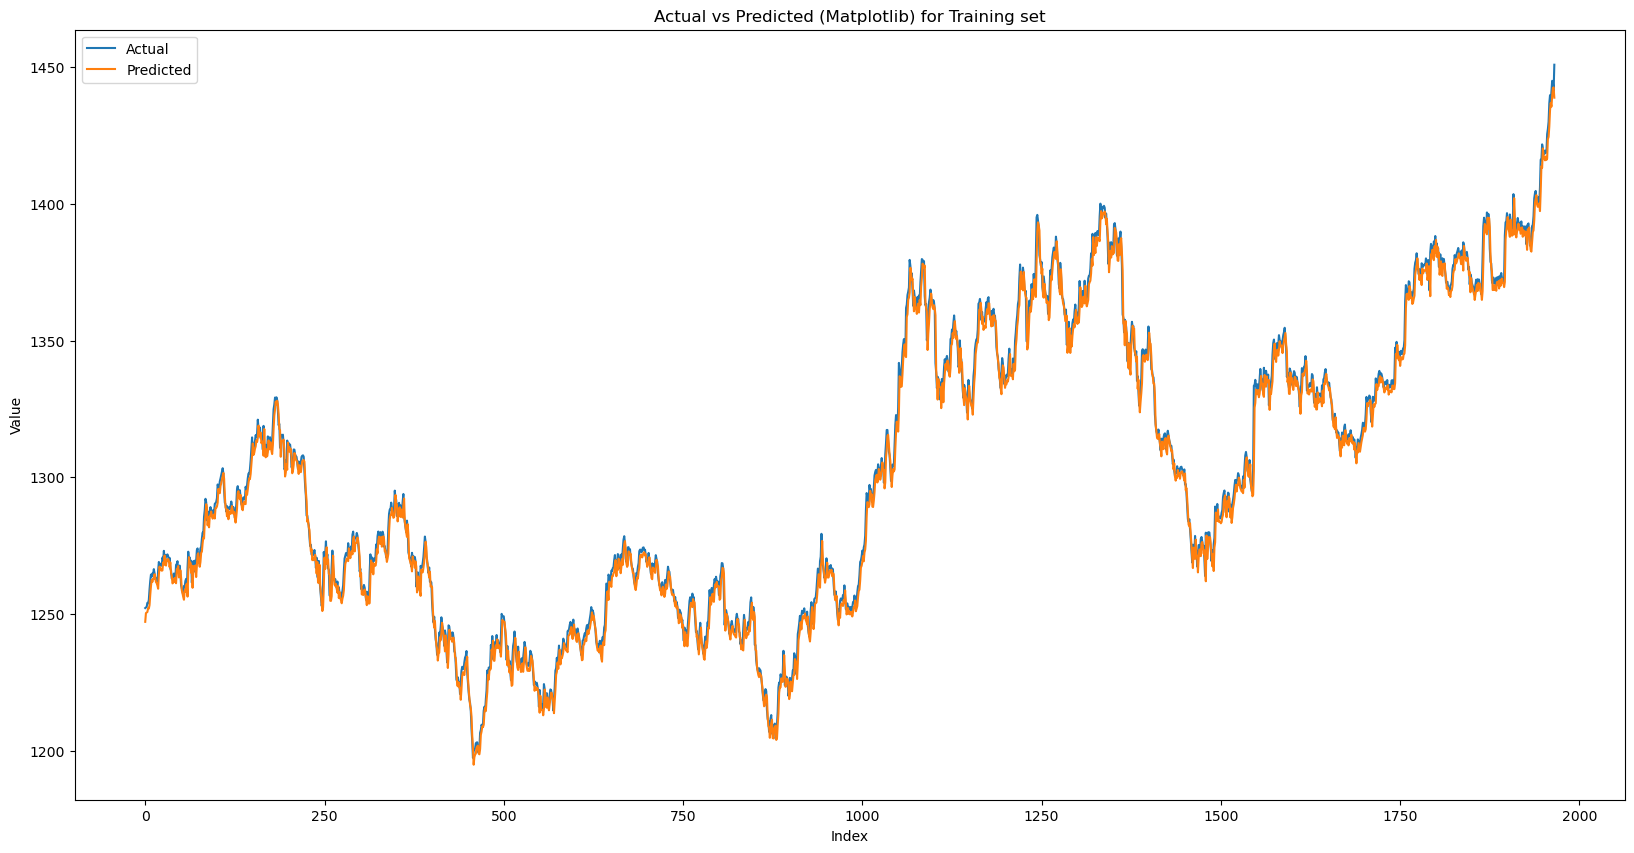

In [43]:
plt.figure(figsize=(20, 10))
plt.plot(Y_train, label='Actual')
plt.plot(train_p, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted (Matplotlib) for Training set')
plt.legend()
plt.show()

In [44]:
def calculate_mape(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mape

In [45]:
mape_value = calculate_mape(Y_test, test_p)

In [46]:
mape_value

1.2436411803715268

In [47]:
print("Mean Absolute Percentage Error (MAPE):", mape_value, "%")

Mean Absolute Percentage Error (MAPE): 1.2436411803715268 %


# Stock Trading

In [48]:
len(Y_test)

192

In [49]:
len(test_p)

192

In [50]:
ma=[np.mean(x) for x in x_test]
ma=scale.inverse_transform(np.array(ma).reshape(-1,1))

In [51]:
len(ma)

192

In [53]:
ma=ma.reshape(len(ma))

In [55]:
Y_test=Y_test.reshape(len(ma))
test_p=test_p.reshape(len(ma))

In [56]:
ma

array([1316.4333374 , 1312.36833903, 1310.5583374 , 1308.66500244,
       1306.47000326, 1304.80333659, 1304.08000488, 1302.7600057 ,
       1301.91833903, 1301.25334066, 1300.17834066, 1301.28834229,
       1302.15334473, 1303.65667725, 1305.58667806, 1307.28834635,
       1307.72834473, 1308.28667806, 1309.95167643, 1311.43001302,
       1313.41001383, 1316.79667969, 1320.18834635, 1322.72834473,
       1325.64501139, 1327.40667725, 1328.88834229, 1331.37167562,
       1334.89834391, 1339.36000977, 1342.63334147, 1345.14000651,
       1347.80000814, 1350.08834229, 1353.68000895, 1355.84000651,
       1358.50167236, 1360.86333822, 1362.13833822, 1363.20333659,
       1365.19666748, 1364.75500081, 1364.64499919, 1364.38666585,
       1363.61999919, 1363.13000081, 1362.61500244, 1363.33500163,
       1363.75166829, 1363.95500081, 1364.29833577, 1363.87833659,
       1363.63833415, 1362.76333415, 1361.84833577, 1361.59000244,
       1361.48166911, 1360.33166911, 1359.18166911, 1357.70166

In [57]:
principal = 100000
num_holdings = 0
short_hold = 0
threshold = 1
values = []
values.append(100000)
hold = []

for i in range(len(Y_test)):
    if test_p[i] > ma[i] * threshold:
        if short_hold > 0:
            # Cover a short position and take profit
            short_hold -= 1
            principal += Y_test[i]
        else:
            # Buy the stock
            num_holdings += 1
            principal -= Y_test[i]
    elif test_p[i] < ma[i] / threshold and num_holdings > 0:
        # Sell a long position and take profit
        num_holdings -= 1
        principal += Y_test[i]
    elif test_p[i] < ma[i] / threshold and short_hold == 0:
        # Short sell the stock if no long position is held
        short_hold += 1
        principal += Y_test[i]

    values.append(principal)
    hold.append(num_holdings)

principal += short_hold * Y_test[-1]
values[-1] = principal


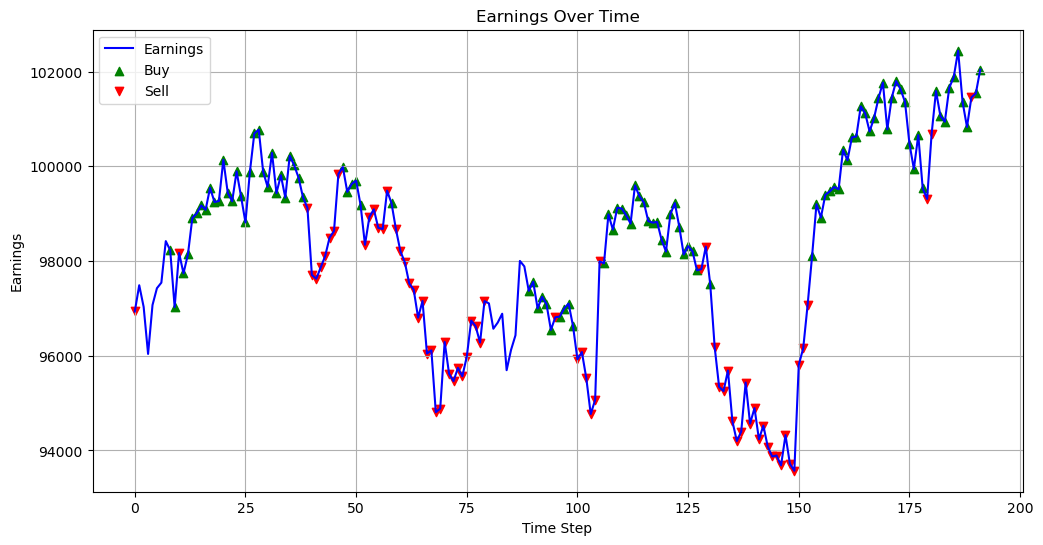

In [58]:
# Calculate earnings at each time step
earnings = []
for i in range(len(values)-1):
    earnings.append(principal + (num_holdings * Y_test[i]))

# Ensure that time_steps and earnings have the same length
time_steps = list(range(len(Y_test)))

# Plot your earnings over time
plt.figure(figsize=(12, 6))
plt.plot(time_steps, earnings, label='Earnings', color='blue')
plt.xlabel('Time Step')
plt.ylabel('Earnings')
plt.title('Earnings Over Time')
plt.grid(True)

# Mark buy and sell points on the plot
buy_points = [i for i in range(len(hold)) if hold[i] > hold[i - 1]]
sell_points = [i for i in range(len(hold)) if hold[i] < hold[i - 1]]
plt.scatter(buy_points, [earnings[i] for i in buy_points], marker='^', color='green', label='Buy')
plt.scatter(sell_points, [earnings[i] for i in sell_points], marker='v', color='red', label='Sell')

plt.legend()
plt.show()
